In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import colors

In [74]:
df = pd.read_csv("D:/Churn Detection/BankChurners.csv")

In [75]:
columns = df.columns
df = df.drop(labels = [columns[0], columns[-1], columns[-2]], axis=1)
columns = df.columns
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# **Basic Preprocessing**

1. All the string objects will be **lowercased**
2. The categorical features will be **encoded**
3. The data will be looked for **missing** values

In [76]:
for col in columns:
    
    dtype = str(df[col].dtype)
    
    if "object" in dtype or "string" in dtype or "str" in dtype:
        df[col] = df[col].apply(str.lower)

df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,existing customer,45,m,3,high school,married,$60k - $80k,blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,existing customer,49,f,5,graduate,single,less than $40k,blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,existing customer,51,m,3,graduate,married,$80k - $120k,blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,existing customer,40,f,4,high school,unknown,less than $40k,blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,existing customer,40,m,3,uneducated,married,$60k - $80k,blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [77]:
#Finding if any of the columns have any unknown values

for col in columns:
    
    missingCnts = df[col].isna().sum()
    
    print(f"There are {missingCnts} missing values in column {col}")

There are 0 missing values in column Attrition_Flag
There are 0 missing values in column Customer_Age
There are 0 missing values in column Gender
There are 0 missing values in column Dependent_count
There are 0 missing values in column Education_Level
There are 0 missing values in column Marital_Status
There are 0 missing values in column Income_Category
There are 0 missing values in column Card_Category
There are 0 missing values in column Months_on_book
There are 0 missing values in column Total_Relationship_Count
There are 0 missing values in column Months_Inactive_12_mon
There are 0 missing values in column Contacts_Count_12_mon
There are 0 missing values in column Credit_Limit
There are 0 missing values in column Total_Revolving_Bal
There are 0 missing values in column Avg_Open_To_Buy
There are 0 missing values in column Total_Amt_Chng_Q4_Q1
There are 0 missing values in column Total_Trans_Amt
There are 0 missing values in column Total_Trans_Ct
There are 0 missing values in column

In [78]:
#Though the print statements states that there are 0 missing values
#but the thing is we have 'unknown' as nan in the rows
#so to remove the unkown values what we can do is remove the rows with unkown values

churnedBefore = (df['Attrition_Flag'] != 'existing customer').astype(int).sum() / df.__len__() * 100
print(f"Dataset length before {df.__len__()}")
print(f"Percentage of people churned before removing unknown rows {churnedBefore:.2f}%")

dfNew = df.copy()

for col in columns:
    
    dfNew = dfNew[dfNew[col] != 'unknown']

churnedAfter = (dfNew['Attrition_Flag'] != 'existing customer').astype(int).sum() / dfNew.__len__() * 100
print(f"Dataset length after {dfNew.__len__()}")
print(f"Percentage of people churned before removing unknown rows {churnedAfter:.2f}%")

Dataset length before 10127
Percentage of people churned before removing unknown rows 16.07%
Dataset length after 7081
Percentage of people churned before removing unknown rows 15.72%


In [79]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,existing customer,45,m,3,high school,married,$60k - $80k,blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,existing customer,49,f,5,graduate,single,less than $40k,blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,existing customer,51,m,3,graduate,married,$80k - $120k,blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,existing customer,40,f,4,high school,unknown,less than $40k,blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,existing customer,40,m,3,uneducated,married,$60k - $80k,blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [80]:
'''Since after removing the rows that contained the unkown value, we can see the dataset length decreased to 7081 which is nearly
30 percent of the original dataset, and also in our task unknown value may contain some information like customers whose
income is unknown or education is unknown may depict patterns which may help model learn features, so we don't remove it'''

#Re-storing the original dataset
dfNew = df.copy()

In [82]:
colVals

{'Attrition_Flag': {'existing customer': 0, 'attrited customer': 1},
 'Gender': {'m': 0, 'f': 1},
 'Education_Level': {'high school': 0,
  'graduate': 1,
  'uneducated': 2,
  'unknown': 3,
  'college': 4,
  'post-graduate': 5,
  'doctorate': 6},
 'Marital_Status': {'married': 0, 'single': 1, 'unknown': 2, 'divorced': 3},
 'Income_Category': {'$60k - $80k': 0,
  'less than $40k': 1,
  '$80k - $120k': 2,
  '$40k - $60k': 3,
  '$120k +': 4,
  'unknown': 5},
 'Card_Category': {'blue': 0, 'gold': 1, 'silver': 2, 'platinum': 3}}

In [83]:
colVals = {}

for col in columns:
    
    dtype = str(dfNew[col].dtype)
    if "object" in dtype or "str" in dtype or "string" in dtype:
        
        # print(f"The unique values in {col} column is {dfNew[col].unique()}")
        
        for idx, val in enumerate(dfNew[col].unique()):
            
            if colVals.get(col, -1) == -1:
                colVals.update({col : {val : idx}})
            else:
                colVals[col].update({val : idx})

for cols, cats in colVals.items():
    # print(f"{cols}:\n\t{cats}")
    dfNew[cols] = dfNew[cols].map(cats)

dfNew.head()


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,0,0,0,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,1,5,1,1,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,0,3,1,0,2,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,1,4,0,2,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,0,3,2,0,0,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [41]:
#Uncommet to see the colVals data

#colVals

In [ ]:
dfNew['Avg_Utiliza=tion_Ratio'].sum()

np.float64(2783.847)

In [97]:
#Saving the preprocessed data to continue from where left

dfNew.to_csv('D:/Churn Detection/PreProcessed Data.csv')

# **Exploratory Data Analysis-I**

In the cells below I have analyzed columns:<br>

1. Age
2. Categorical Features:
    * Gender
    * Education Level
    * Marital status
    * Income Cateogry
    * Card Cateogry
4. Dependent Counts
3. Months On Book

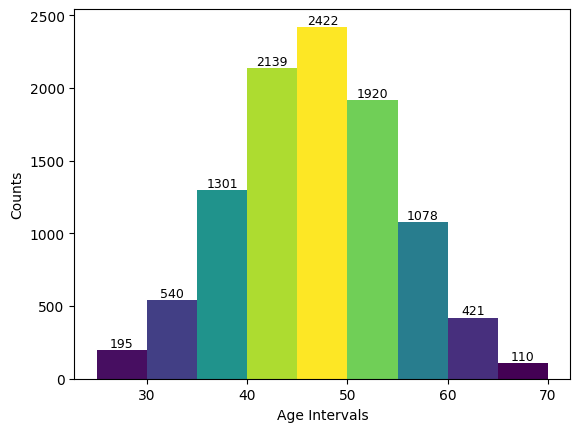

In [85]:
bins = [i for i in range(dfNew['Customer_Age'].min() - (dfNew['Customer_Age'].min()%5), dfNew['Customer_Age'].max(), 5)]
n1, bins, patches = plt.hist(dfNew['Customer_Age'], bins=bins)
plt.ylabel("Counts")
plt.xlabel("Age Intervals")

fracs = n1 / n1.max()

norm = colors.Normalize(fracs.min(), fracs.max())

for count, thisFrac, thisPatch in zip(n1, fracs, patches):
    color = plt.cm.viridis(norm(thisFrac))
    thisPatch.set_facecolor(color)
    
    x = thisPatch.get_x() + thisPatch.get_width() / 2   
    y = thisPatch.get_height()
    plt.text(x, y, int(count), ha='center', va='bottom', fontsize=9)

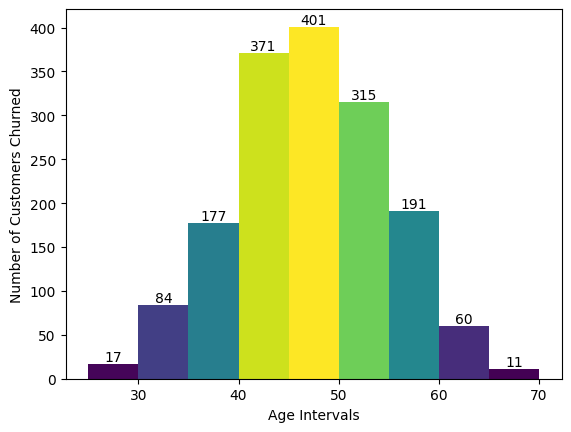

In [86]:
dfTest = dfNew.copy()
dfTest = dfNew[dfNew['Attrition_Flag'] == 1]
n2, bins, patches = plt.hist(dfTest['Customer_Age'], bins=[i for i in range(dfNew['Customer_Age'].min() - (dfNew['Customer_Age'].min()%5), dfNew['Customer_Age'].max(), 5)])
plt.xlabel('Age Intervals')
plt.ylabel('Number of Customers Churned')

fracs = n2/n2.max()

norm = colors.Normalize(fracs.min(), fracs.max())

for count, thisFrac, thisPatch in zip(n2, fracs, patches):
    
    color = plt.cm.viridis(norm(thisFrac))
    thisPatch.set_facecolor(color)

    x = thisPatch.get_x() + thisPatch.get_width() / 2
    y = thisPatch.get_height()
    
    plt.text(x, y, int(count), ha='center', va='bottom')

In [87]:
categoricalAnalysis = []

for col, vals in colVals.items():
    
    catDF = []  
    if col == 'Attrition_Flag':
        continue
    
    for val, idx in vals.items():
        
        dfTemp = dfNew[dfNew[col] == idx]
        
        totalCnt = dfTemp.__len__()
        churnedCnt = int((dfTemp['Attrition_Flag'] == 1).sum())
        catDF.append({ "Category Name" : val, "Category": idx, "Total" : totalCnt, "Churned" : churnedCnt, "Churned Rate" : round(churnedCnt/totalCnt * 100, 2)})
    
    tempDict = { "Column" : col, "Analysis" : catDF }
    categoricalAnalysis.append(tempDict)

In [88]:
for data in categoricalAnalysis:
    totalCnt = 0
    for an in data['Analysis']:
        totalCnt+=an['Total']
    
    assert totalCnt == dfNew.__len__(), print("Something is wrong")

In [89]:
for dicts in categoricalAnalysis:
    colName = dicts['Column']
    analysis = dicts['Analysis']
    
    file_name = f"{colName}_categorical_analysis.csv"
    
    categories = []
    categoryLabel = []
    total = []
    churned = []
    churnedRate = []
    
    for val in analysis:
        
        categories.append(val['Category Name'])
        categoryLabel.append(val['Category'])
        total.append(val['Total'])
        churned.append(val['Churned'])
        churnedRate.append(val['Churned Rate'])
    
    dfToSave = pd.DataFrame({
        'Categories' : categories,
        'Category Label' : categoryLabel,
        'Total Customers' : total,
        'Churned Customers' : churned,
        'Churn Rate' : churnedRate
    })
    
    dfToSave.to_csv(file_name)

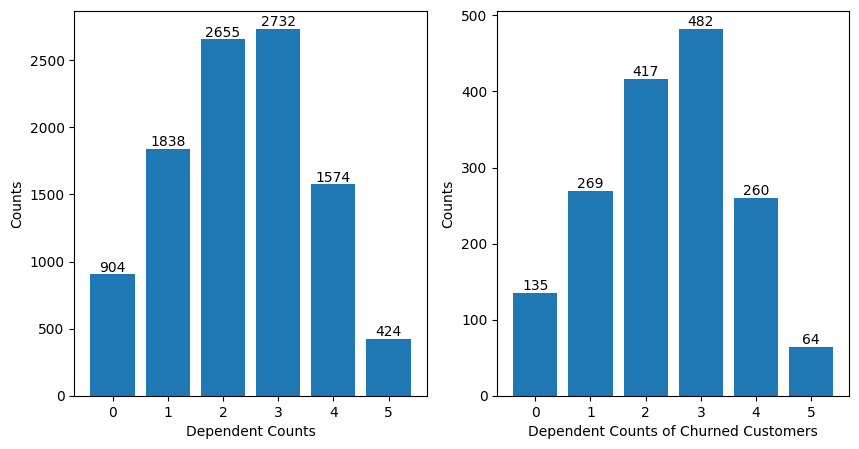

In [90]:
# depenVars = df['Dependent_count'].unique()

dfTemp = dfNew[dfNew['Attrition_Flag'] == 1]

depenDicts = dfNew['Dependent_count'].value_counts().sort_index()
depenDictsChurned = dfNew[dfNew['Attrition_Flag'] == 1]['Dependent_count'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
bars = plt.bar([key for key, _ in depenDicts.items()], [val for _, val in depenDicts.items()])
plt.xlabel('Dependent Counts')
plt.ylabel('Counts')

for bar in bars:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    
    plt.text(x, height, int(height), ha = 'center', va = 'bottom')

plt.subplot(1, 2, 2)
bars = plt.bar([key for key, _ in depenDictsChurned.items()], [val for _, val in depenDictsChurned.items()])
plt.xlabel('Dependent Counts of Churned Customers')
plt.ylabel('Counts')

for bar in bars:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    
    plt.text(x, height, int(height), ha = 'center', va = 'bottom')


churnRateDepenCnt = { cnt : float(depenDictsChurned.get(cnt, 0)/total) * 100 for cnt, total in depenDicts.items() }

In [4]:
dfNew = pd.read_csv('D:/Churn Detection/PreProcessed Data.csv')

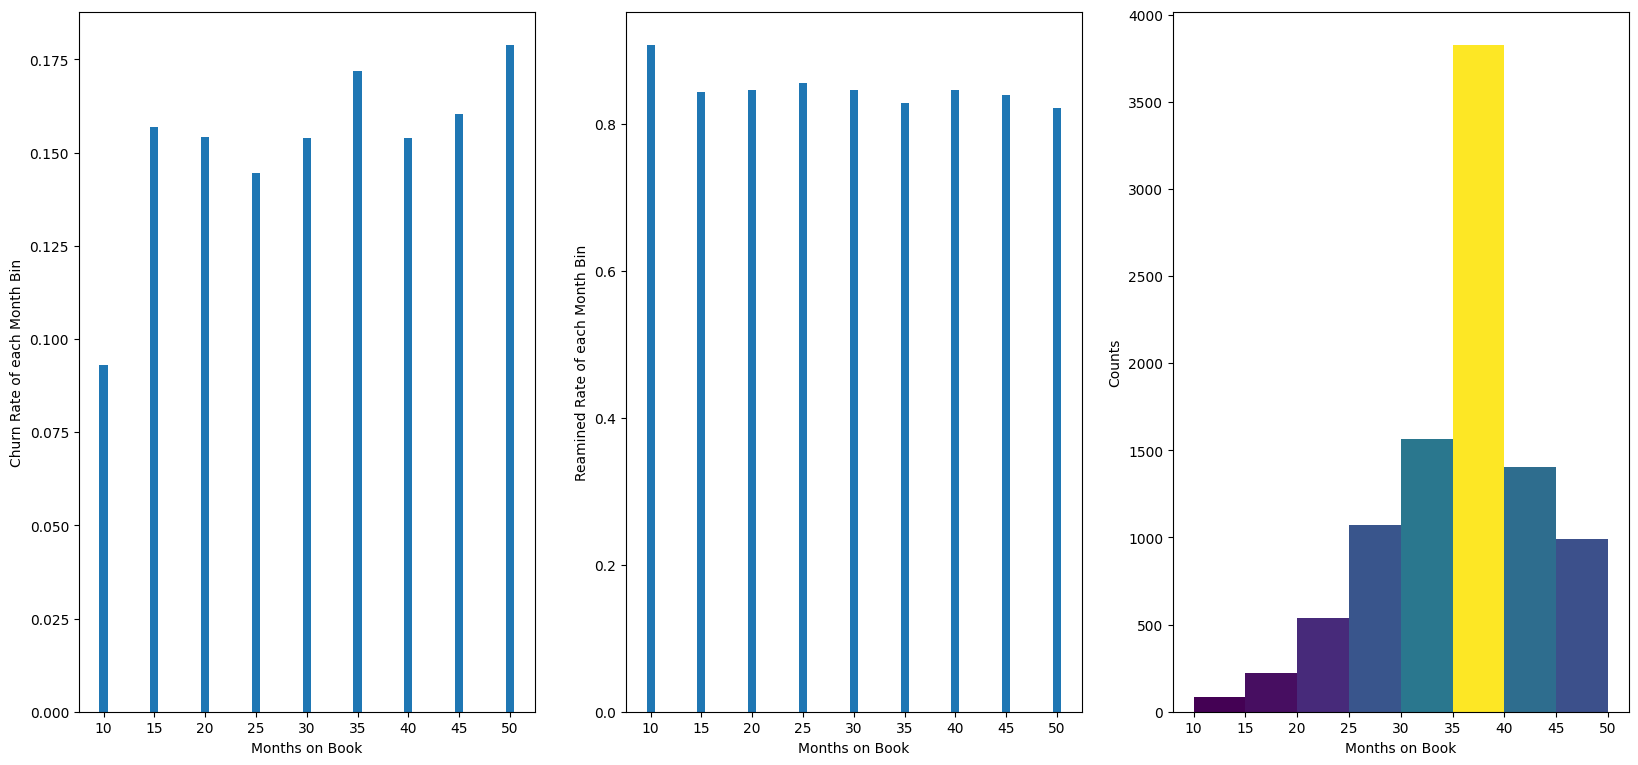

(10, 9, [86, 223, 538, 1073, 1565, 3826, 1404, 898, 369])

In [37]:
monthsOnBookBins = [val for val in range(dfNew['Months_on_book'].min() - dfNew['Months_on_book'].min()%5, dfNew['Months_on_book'].max(), 5)]

monthsOnBooksList = []
monthsOnBooksRemain = []
totalInEachBin = []

for i in range(len(monthsOnBookBins) - 1):
    
    low = monthsOnBookBins[i]
    high = monthsOnBookBins[i + 1]
    
    dfTemp = dfNew[(dfNew['Months_on_book'] >= low) & (dfNew['Months_on_book'] < high)]
    
    total = dfTemp.__len__()
    churned = (dfTemp[dfTemp['Attrition_Flag'] == 1]).__len__()
    remained = total - churned
    
    monthsOnBooksList.append(churned/total)
    monthsOnBooksRemain.append(remained/total)
    totalInEachBin.append(total)

plt.figure(figsize=(20, 20))
plt.subplot(2, 3, 1)
plt.bar(x = monthsOnBookBins[:len(monthsOnBookBins) - 1], height = monthsOnBooksList)
plt.xlabel("Months on Book")
plt.ylabel("Churn Rate of each Month Bin")

plt.subplot(2, 3, 2)
plt.bar(monthsOnBookBins[:len(monthsOnBookBins) - 1], height = monthsOnBooksRemain)
plt.xlabel("Months on Book")
plt.ylabel("Reamined Rate of each Month Bin")

plt.subplot(2, 3, 3)
n, bins, patches = plt.hist(dfNew['Months_on_book'], bins = monthsOnBookBins[: len(monthsOnBookBins) - 1])
plt.xlabel("Months on Book")
plt.ylabel("Counts")

fracs = n/n.max()

norm = colors.Normalize(fracs.min(), fracs.max())

for thisFrac, thisPatch in zip(fracs, patches):
    
    color = plt.cm.viridis(norm(thisFrac))
    thisPatch.set_facecolor(color)


plt.show()
len(monthsOnBookBins),len(monthsOnBooksList), totalInEachBin

In [92]:
dfNew.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,0,0,0,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,1,5,1,1,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,0,3,1,0,2,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,1,4,0,2,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,0,3,2,0,0,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# **Results**

From this Notebook we have preprocessed data and analyzed demographics like age, gender etc.

We have made seperate CSV for each categorical features, you can look at each of those csv's. The Name format for<br>
the csv's is `{name of feature}_categorical_analysis.csv`